![image](dependencies/open-science-prize.png)

## Higher Fidelity Graph States
In this notebook, we will prepare quantum circuits for a 7-qubit graph state and estimate the fidelity through stabilizer measurements using Qiskit. In this example, we use the CTMP method of error mitigation [1] and repeat the graph state measurement 16 times to find statistical error bars.

**To Do:
Modify the graph state preparation circuit or use your own methods of error mitigation to improve the graph state fidelity.**


[1] S. Bravyi, S. Sheldon, A. Kandala, D.C. McKay, J.M. Gambetta, Mitigating measurement errors in multi-qubit experiments, [arXiv:2006.14044](https://arxiv.org/abs/2006.14044) (2020).

## Imports

Begin by importing the necessary packages and defining the functions we will need for the stabilizer measurements.

In [1]:
# Qiskit module
from qiskit import QuantumCircuit
import qiskit.circuit.library as circuit_library
import qiskit.quantum_info as qi
import qiskit.ignis.mitigation as mit

# Qiskit tools for noisy simulation
from qiskit.providers.aer import QasmSimulator
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.utils import insert_noise

# Qiskit tools for running and monitoring jobs
from qiskit import execute
from qiskit.tools.monitor import job_monitor

# Other imports
import numpy as np

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In order to run the circuits, first load the backend `ibmq_casablanca` from your account using the `IBMQ` provider. You will receive access to `ibm-q-community/ibmquantumawards/open-science` after registering for the Open Science Prize.

In [2]:
# Load IBMQ Account data
from qiskit import IBMQ
IBMQ.load_account()

# Get backend for experiment
provider = IBMQ.get_provider(hub='ibm-q-france', group='univ-montpellier', project='default')
backend = provider.get_backend('ibmq_casablanca')
properties = backend.properties()

## Preparing graph states

Here, we prepare the graph state circuit for 7-qubits using the `GraphState` function in Qiskit's circuit library. We define a graph that uses the connectivity map of the quantum system `ibmq_casablanca`.

In [3]:
num_qubits = 7

# adjacency matrix for `ibmq_casablanca`
adjmat = [
    [0, 1, 0, 0, 0, 0, 0],
    [1, 0, 1, 1, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 1, 1, 0, 1],
    [0, 0, 0, 0, 0, 1, 0]]

### Your code goes here

How would you prepare a graph state with high fidelity? In the example below, we create it using Qiskit's circuit library at the gate level. You may explore other methods for creating the graph states, including by using pulse-level techniques or accounting for the errors in the quantum system.

In [4]:
def create_graph_state():

    ### YOUR CODE GOES HERE -- START

    #graph_state_circuit = circuit_library.GraphState(adjmat)
    graph_state_circuit = QuantumCircuit(7, 1)
    graph_state_circuit.h(list(range(7)))
    graph_state_circuit.cz(0, 1)
    graph_state_circuit.cz(5, 6)
    ### YOUR CODE GOES HERE -- END

    return graph_state_circuit

In [5]:
# the graph state can be created using Qiskit's circuit library
state_circuit = create_graph_state()
state_circuit.draw()

┌───┐   
q_0: ┤ H ├─■─
     ├───┤ │ 
q_1: ┤ H ├─■─
     ├───┤   
q_2: ┤ H ├───
     ├───┤   
q_3: ┤ H ├───
     ├───┤   
q_4: ┤ H ├───
     ├───┤   
q_5: ┤ H ├─■─
     ├───┤ │ 
q_6: ┤ H ├─■─
     └───┘   
c: 1/════════

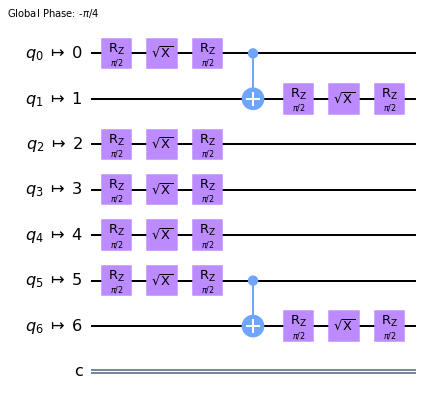

In [6]:
from qiskit import transpile
compiled_state_circuit = transpile(state_circuit, backend=backend)
compiled_state_circuit.draw(output="mpl")


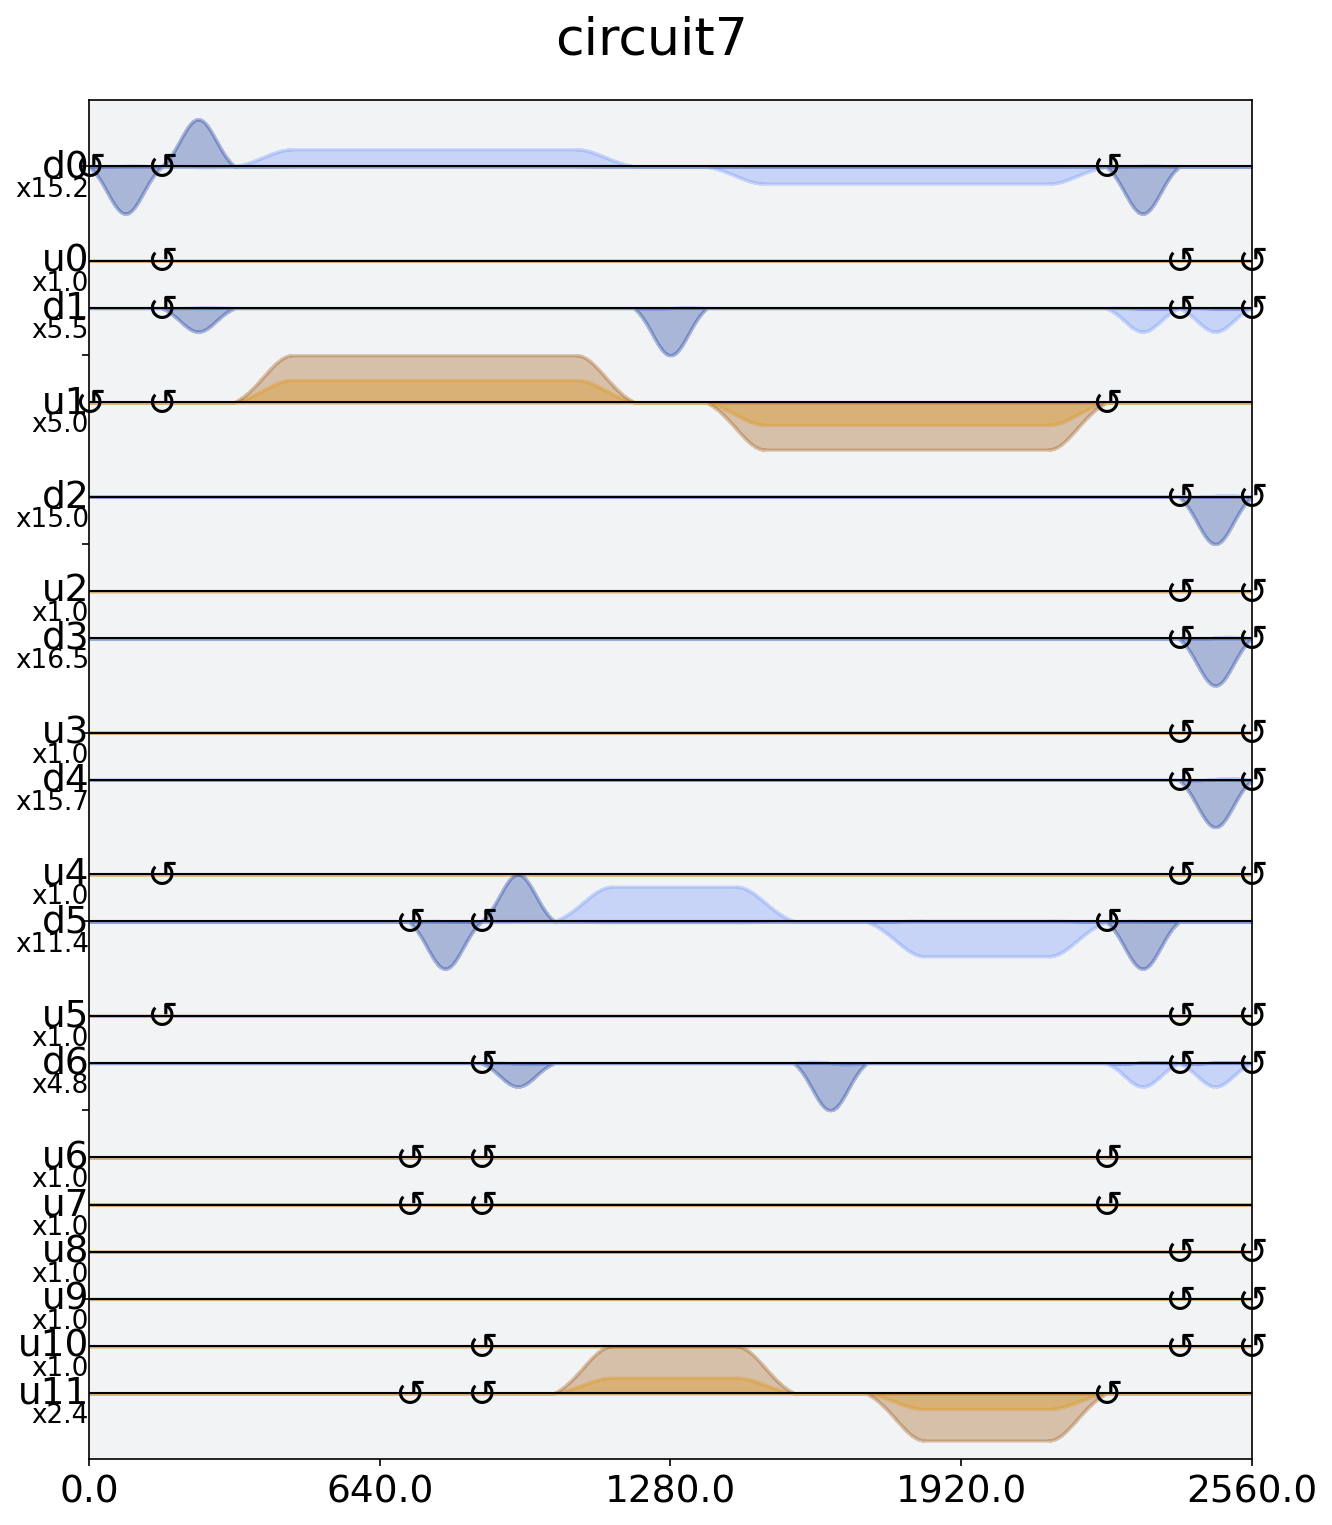

In [7]:
from qiskit import schedule
from qiskit.visualization import pulse_drawer
schd = schedule(compiled_state_circuit, backend)
pulse_drawer(schd)

In [45]:
from IPython.display import display, Math
display(Math(backend.configuration().hamiltonian["h_latex"]))

<IPython.core.display.Math object>

In [46]:
backend.configuration().hamiltonian

{'description': 'Qubits are modeled as Duffing oscillators. In this case, the system includes higher energy states, i.e. not just |0> and |1>. The Pauli operators are generalized via the following set of transformations:\n\n$(\\mathbb{I}-\\sigma_{i}^z)/2 \\rightarrow O_i \\equiv b^\\dagger_{i} b_{i}$,\n\n$\\sigma_{+} \\rightarrow b^\\dagger$,\n\n$\\sigma_{-} \\rightarrow b$,\n\n$\\sigma_{i}^X \\rightarrow b^\\dagger_{i} + b_{i}$.\n\nQubits are coupled through resonator buses. The provided Hamiltonian has been projected into the zero excitation subspace of the resonator buses leading to an effective qubit-qubit flip-flop interaction. The qubit resonance frequencies in the Hamiltonian are the cavity dressed frequencies and not exactly what is returned by the backend defaults, which also includes the dressing due to the qubit-qubit interactions.\n\nQuantities are returned in angular frequencies, with units 2*pi*GHz.\n\nWARNING: Currently not all system Hamiltonian information is available